# Deep SARSA Algorithm

In [1]:
import os
import json
import wandb
import gymnasium as gym
from matplotlib import pyplot as plt
import seaborn as sns
from models.sarsa import SARSA

## Initializing Environment and Hyperparameters

In [ ]:
env = gym.make('LunarLander-v2', continuous=False, render_mode='rgb_array')
learning_rate = 0.0005
discount_factor = 0.99  
exploration_rate = 1.0
episodes = 500
max_steps = 1000

## Training

In [7]:
agent = SARSA(env, learning_rate, discount_factor, exploration_rate)
history = agent.train(episodes, max_steps, log_wandb=True, save_episodes=True, save_interval=100)

[EP 1/500] - Reward: -133.3120 - Steps: 84 - Eps: 0.8262 - Time: 7.83s
[EP 2/500] - Reward: -223.7573 - Steps: 79 - Eps: 0.3735 - Time: 16.73s
[EP 3/500] - Reward: -173.9628 - Steps: 124 - Eps: 0.1074 - Time: 30.51s
[EP 4/500] - Reward: -264.3365 - Steps: 145 - Eps: 0.0250 - Time: 34.86s
[EP 5/500] - Reward: -294.2786 - Steps: 122 - Eps: 0.0100 - Time: 30.39s
[EP 6/500] - Reward: -84.0234 - Steps: 74 - Eps: 0.0100 - Time: 18.48s
[EP 7/500] - Reward: -245.4755 - Steps: 71 - Eps: 0.0100 - Time: 17.87s
[EP 8/500] - Reward: -306.0707 - Steps: 77 - Eps: 0.0100 - Time: 19.79s
[EP 9/500] - Reward: -605.7181 - Steps: 85 - Eps: 0.0100 - Time: 21.98s
[EP 10/500] - Reward: -182.0371 - Steps: 169 - Eps: 0.0100 - Time: 45.81s
[EP 11/500] - Reward: -305.6662 - Steps: 87 - Eps: 0.0100 - Time: 25.20s
[EP 12/500] - Reward: -177.1108 - Steps: 70 - Eps: 0.0100 - Time: 21.68s
[EP 13/500] - Reward: -131.1045 - Steps: 56 - Eps: 0.0100 - Time: 16.66s
[EP 14/500] - Reward: -164.6308 - Steps: 82 - Eps: 0.0100 

epsilon,█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
reward,▁▃▁▃▃▃▃▃▄▂▃▇▇▅█▆▇▇▇████▇█▇▇▇▄▇█▇▇▇▇▇██▅█
steps,▁▁▁▁▁▂▃▁█▂▂▅▃▆▃▆▃▂▃▃▂▂▂▂▃▂▃▂▂▂▂▄▃▃▃▂▂▂▂▂
epsilon,0.01
reward,-9.24243
steps,169


In [8]:
# save history
if not os.path.exists('./history'):
        os.mkdir('./history')

with open('./history/sarsa_history.json', 'w') as file:
    json.dump(history, file)

## Evaluation

In [2]:
with open('history\sarsa_history.json', 'r') as file:
    history = json.load(file)

rewards, avg_rewards, steps = history['reward'], history['avg_reward_100'], history['steps']

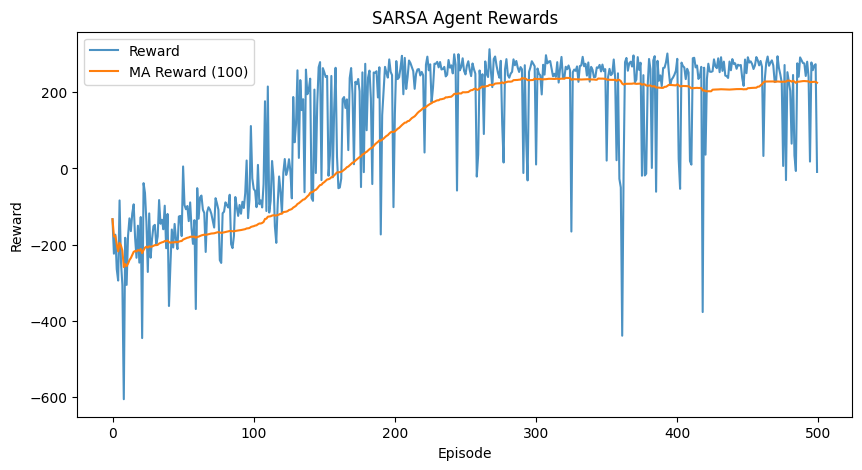

In [5]:
plt.figure(figsize=(10, 5))

plt.plot(rewards, alpha=0.8, label='Reward')
plt.plot(avg_rewards, label='MA Reward (100)')

plt.title('SARSA Agent Rewards')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend()

plt.show()

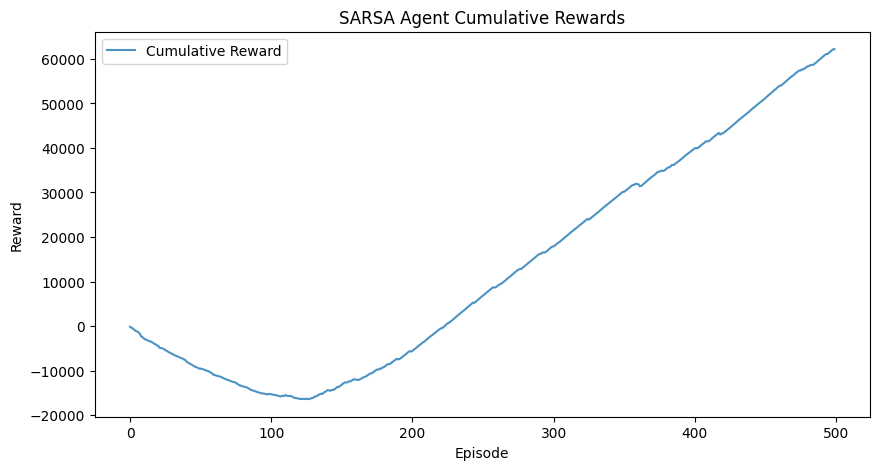

In [6]:
# plot cumulative reward
cumulative_reward = [sum(rewards[:i+1]) for i in range(len(rewards))]
plt.figure(figsize=(10, 5))

plt.plot(cumulative_reward, alpha=0.8, label='Cumulative Reward')

plt.title('SARSA Agent Cumulative Rewards')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend()
plt.show()

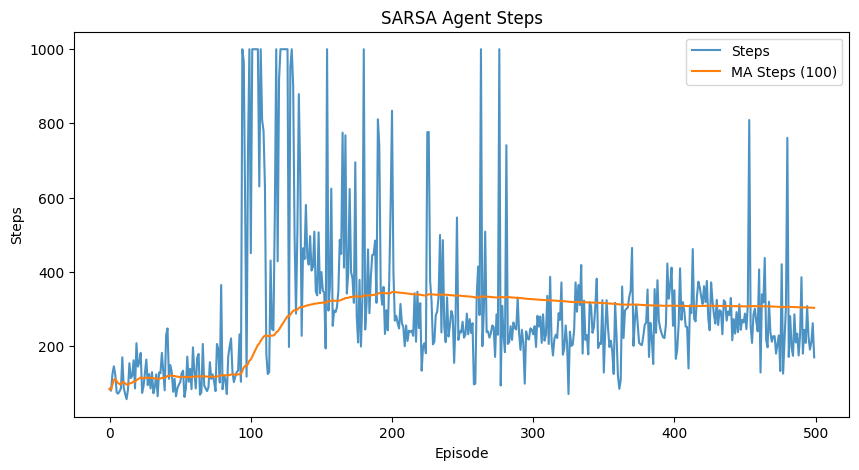

In [7]:
# plot steps and moving average steps
avg_steps = [sum(steps[:i+1])/(i+1) for i in range(len(steps))]
plt.figure(figsize=(10, 5))

plt.plot(steps, alpha=0.8, label='Steps')
plt.plot(avg_steps, label='MA Steps (100)')

plt.title('SARSA Agent Steps')
plt.xlabel('Episode')
plt.ylabel('Steps')
plt.legend()
plt.show()